# Movilidad Sustentable
## Ciencia de Datos & Inteligencia de Negocios
### Analisis Exploratorio de Datos (EDA)

### Configuración

In [ ]:
'''
Bicicletas: Recorridos
Clima: PRCP TAVG TEMP[C] HUM[%] PNM[hPa] DD[gr] FF[km/hr]                                                 
2020-2021
Data acquisition & wrangling
'''

import os
import sys
# import urllib.request

import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from matplotlib import pyplot
# from matplotlib import pyplot, figure
# pyplot.rcParams.keys()
pyplot.rcParams['legend.loc'] = 'best'
pyplot.rcParams['figure.figsize'] = (20,5)
pyplot.rcParams['figure.dpi'] = 320
pyplot.style.use( 'ggplot' )

# import datetime
# from datetime import date, timedelta
# import re

datadir = 'datasets/'

In [ ]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    from google.colab import drive
    drive.mount(
      '/content/drive/', 
    )
    if drive:
        datadir = '/content/drive/MyDrive/Academicos/UTN/BI/datasets/'
else:
    print('Not running on CoLab')

In [ ]:
datasets = {
  'recorridos' : {
    'df'     : pd.DataFrame(),
    'local'  : datadir + 'recorridos.zip',
  },
  'estaciones' : {
    'df'     : pd.DataFrame(),
    'local'  : datadir + 'estaciones.csv',
  }
}

In [ ]:
'''
Cargar datasets
'''
def cargar_datasets( insumos ):
    for i in insumos:
        if 'zip' in insumos[i]['local']:
            insumos[i]['df'] = pd.read_csv(
                insumos[i]['local'],
                compression = 'zip',
                encoding = 'utf-8', 
            )
        if 'csv' in insumos[i]['local']:
            insumos[i]['df'] = pd.read_csv(
                insumos[i]['local'],
            )
        if 'xlsx' in insumos[i]['local']:
            insumos[i]['df'] = pd.read_excel(
                insumos[i]['local'],
            )
        
        print( 'Cargado: ', insumos[i]['local'] )
    return cargar_datasets

In [ ]:
insumos = cargar_datasets( datasets )

In [ ]:
# Revisar en Adquisicion por que faltan estos dias
# datasets['recorridos']['df'][ datasets['recorridos']['df']['DD'].isnull() ]['fecha'].unique()
# array(['2020-01-30', '2020-09-04', '2020-01-31', '2020-01-11',
#        '2020-10-21', '2020-02-13', '2020-10-14', '2020-09-19',
#        '2020-02-11', '2020-12-14', '2020-11-03', '2020-02-15',
#        '2020-10-19', '2020-09-02', '2021-02-14', '2021-01-28'],
#       dtype=object)
# datasets['recorridos']['df'][ datasets['recorridos']['df']['PRCP'].isnull() ]['fecha'].unique()
# array(['2021-02-12', '2021-02-11'], dtype=object)

In [ ]:
# FILL NAN CON PROMEDIO 
for c in datasets['recorridos']['df'].columns:
    nulls = datasets['recorridos']['df'][c].isnull().sum()
    if nulls:
        mean = datasets['recorridos']['df'][c].mean()
        fill = mean
        types = datasets['recorridos']['df'][c].dtypes
        print( c, nulls, types, fill)
        datasets['recorridos']['df'][c].fillna( mean, inplace = True)
# datasets['recorridos']['df'].isnull().sum()

## Analisis Exploratorio de Datos (EDA)

## Time series analisis
- Diaria Delta
- Estacionalidad semanal
- Estacionalidad anual
- Estacionalidad diaria

### Estaciones mas usadas 
- Relación con anclajes
- Bicis ancladas x hora
- Distancias
- Matriz de cantidad de viajes entre cada una
- distancias a zonas de gran afluencia
- duracióones
- desviación de la duración promedio
- Circle graph
- Plazas en uso bicicletas en uso

### IDAS / Vueltas
- Distancias ida
- Duraciones de estaciones a vueltas mismo destino
- deviations del promedio
- nada con distancias

### Gruoup by recurrent users top 20
- Durations mean max
- cantidad de viajes
- duraciones 

## Exploratory Spatial Data Analysis (ESDA)

https://alcidanalytics.com/p/geographic-heatmap-in-python

https://alysivji.github.io/getting-started-with-folium.html

https://medium.com/analytics-vidhya/measure-driving-distance-time-and-plot-routes-between-two-geographical-locations-using-python-39995dfea7e

In [ ]:
# datasets['recorridos']['df'] = datasets['recorridos']['df'].drop(columns = ['Unnamed: 0'])
# datasets['recorridos']['df'].info()

In [ ]:
datasets['recorridos']['df'].describe()

In [ ]:
## Time series analisis

In [7]:
### Analisis Diario
diaria =  datasets['recorridos']['df'].groupby(
    ['origen_nombre', 'origen_id','fecha',]
).agg(
  salidas = ( 'origen_id',  'count'),
  arribos = ( 'destino_id',  'count'),
  duracion = ( 'duracion_mins',  'mean'),
  distancia = ( 'distancia',  'mean'),
)
diaria = diaria.pivot_table(
    index = [ 'origen_nombre', 'origen_id', ],
    columns = ['fecha'],
    values = ['salidas', 'duracion', 'distancia'],
    # aggfunc ='sum',
    fill_value =0,
).sort_values('origen_id')
# diaria.info()

In [ ]:
# demanda_diaria['salidas'].mean().plot()
# # # first we'll do it the default way, with gaps on weekends
# # fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
# # ax1.plot(r.date, r.adj_close, 'o-')
# # ax1.set_title( 'Default' )
# # fig.autofmt_xdate()
# https://news.knowledia.com/US/en/articles/rolling-aggregations-on-time-series-data-with-pandas-b96c64108be946dfa88931b59b9be6209b2b1901
# pyplot.show()

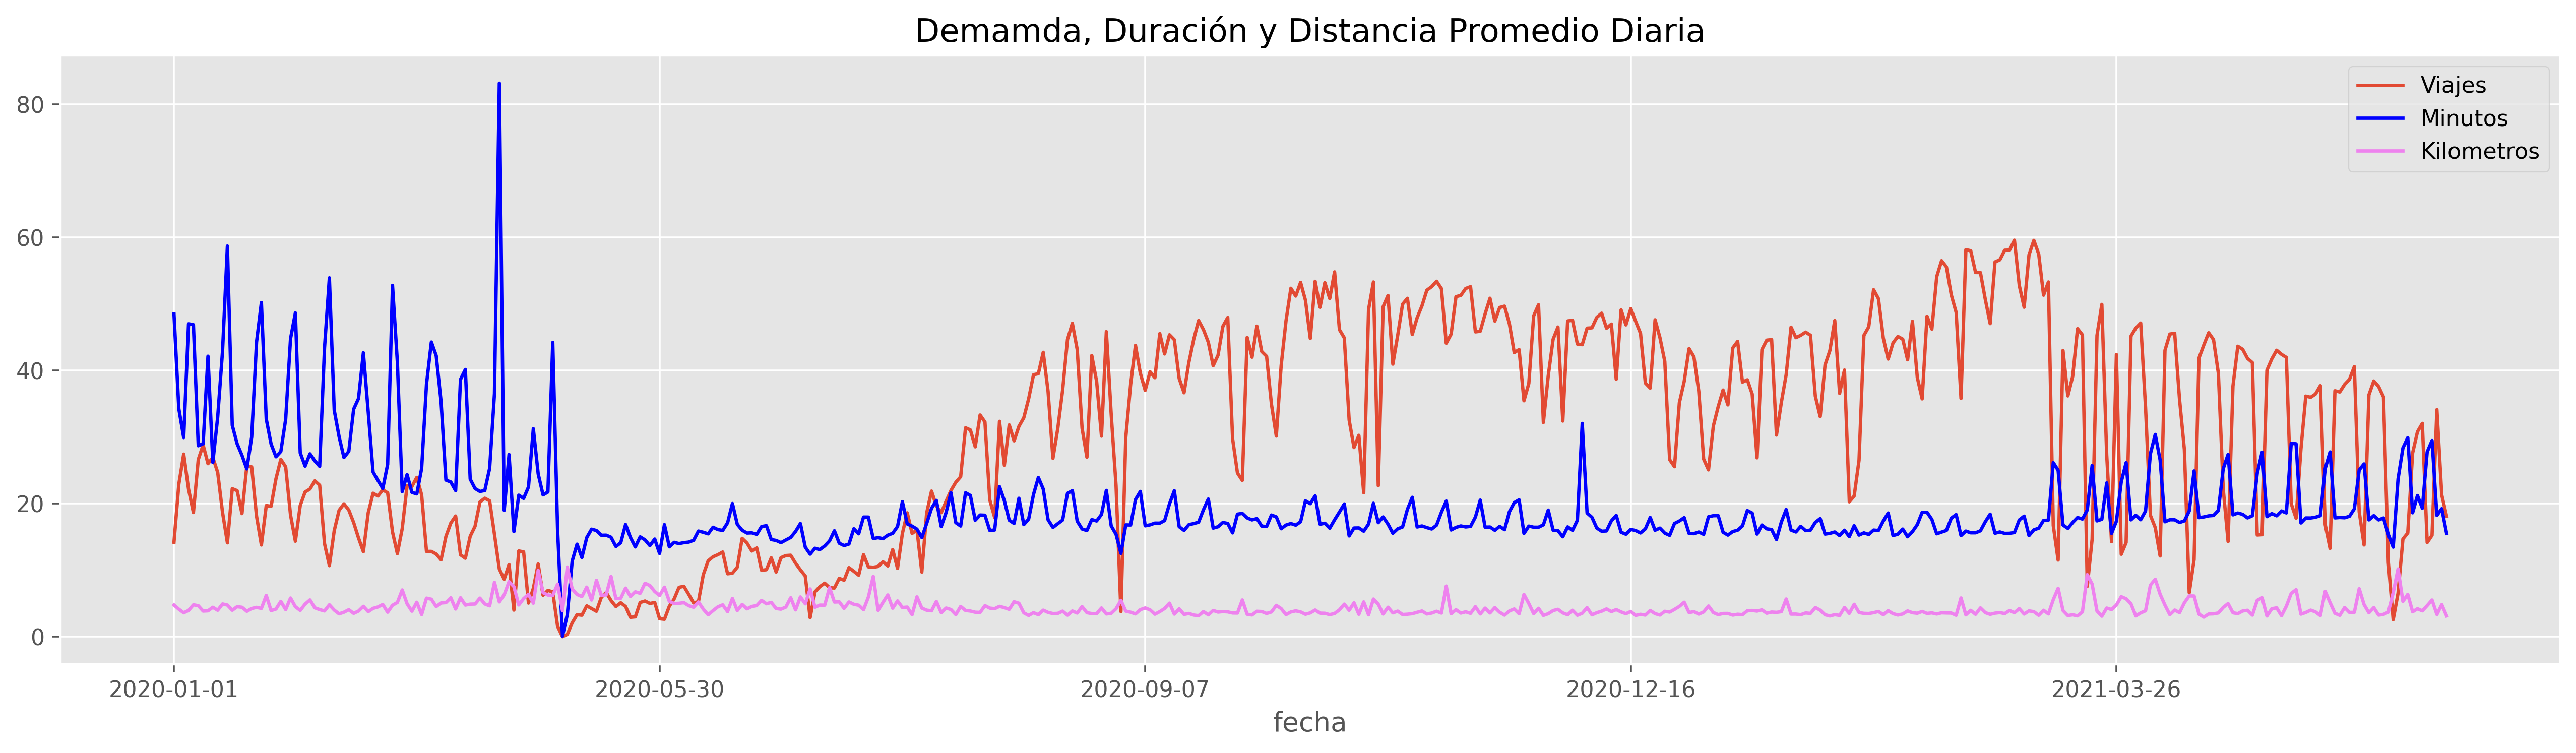

In [8]:
diaria['salidas'].mean().plot( label = 'Viajes' )
diaria['duracion'].mean().plot( label = 'Minutos', color={ 'Minutos': 'blue' } )
diaria['distancia'].max().plot( label = 'Kilometros', color={ 'Kilometros': 'violet' } )
pyplot.legend( loc = 'best' )
pyplot.title( 'Demamda, Duración y Distancia Promedio Diaria' )
pyplot.show()

In [ ]:
## ESTACIONALIDAD SEMANAL

In [9]:
semana = datasets['recorridos']['df'].groupby(
    ['origen_nombre', 'origen_id','wdia',]
).agg(
  salidas = ( 'wdia',  'count'),
  duracion = ( 'duracion_mins',  'mean'),
  distancia = ( 'distancia',  'mean'),
)
semana = semana.pivot_table(
    index = [ 'origen_nombre', 'origen_id', ],
    columns = ['wdia'],
    values = ['salidas', 'duracion', 'distancia'],
    # aggfunc ='sum',
    fill_value =0,
).sort_values('origen_id')

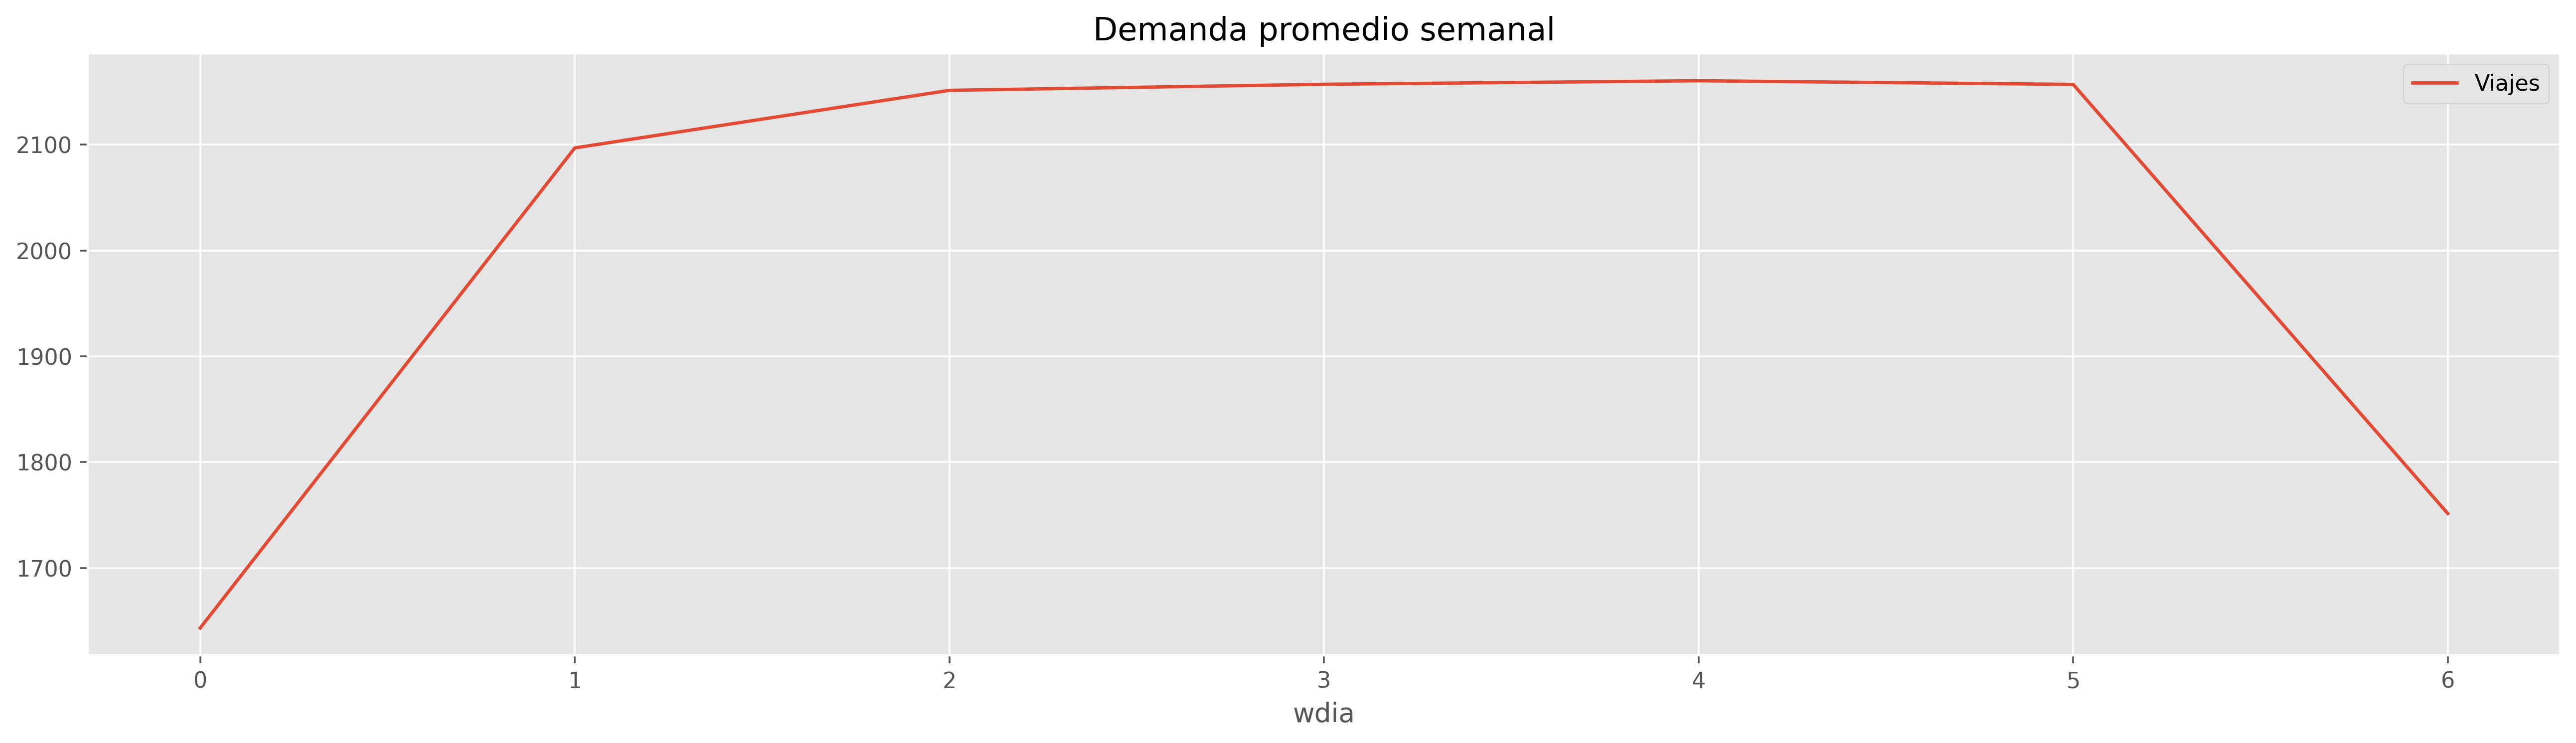

In [15]:
semana['salidas'].mean().plot( kind = 'line', label = 'Viajes')
pyplot.legend( loc = 'best' )
pyplot.title( 'Demanda promedio semanal' )
pyplot.show()

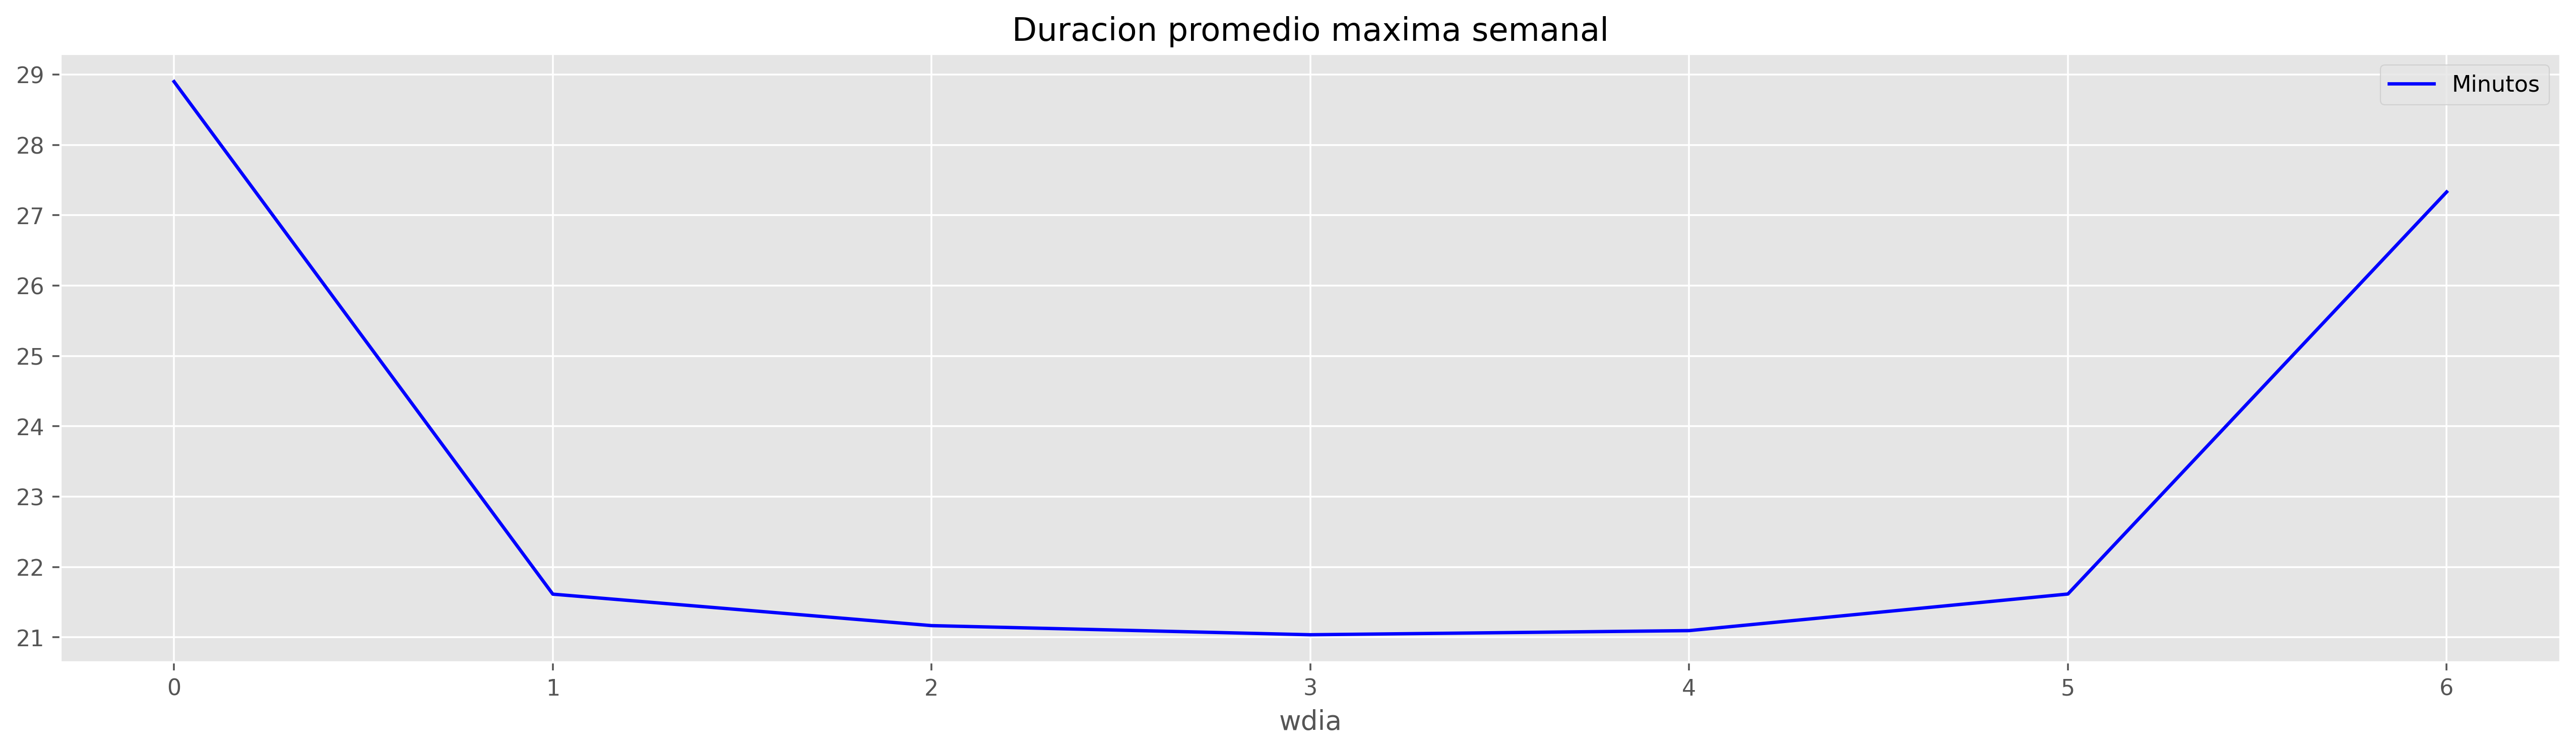

In [17]:
semana['duracion'].mean().plot( kind = 'line', label = 'Minutos', color={ 'Minutos': 'blue' })
pyplot.legend( loc = 'best' )
pyplot.title( 'Duracion promedio maxima semanal' )
pyplot.show()

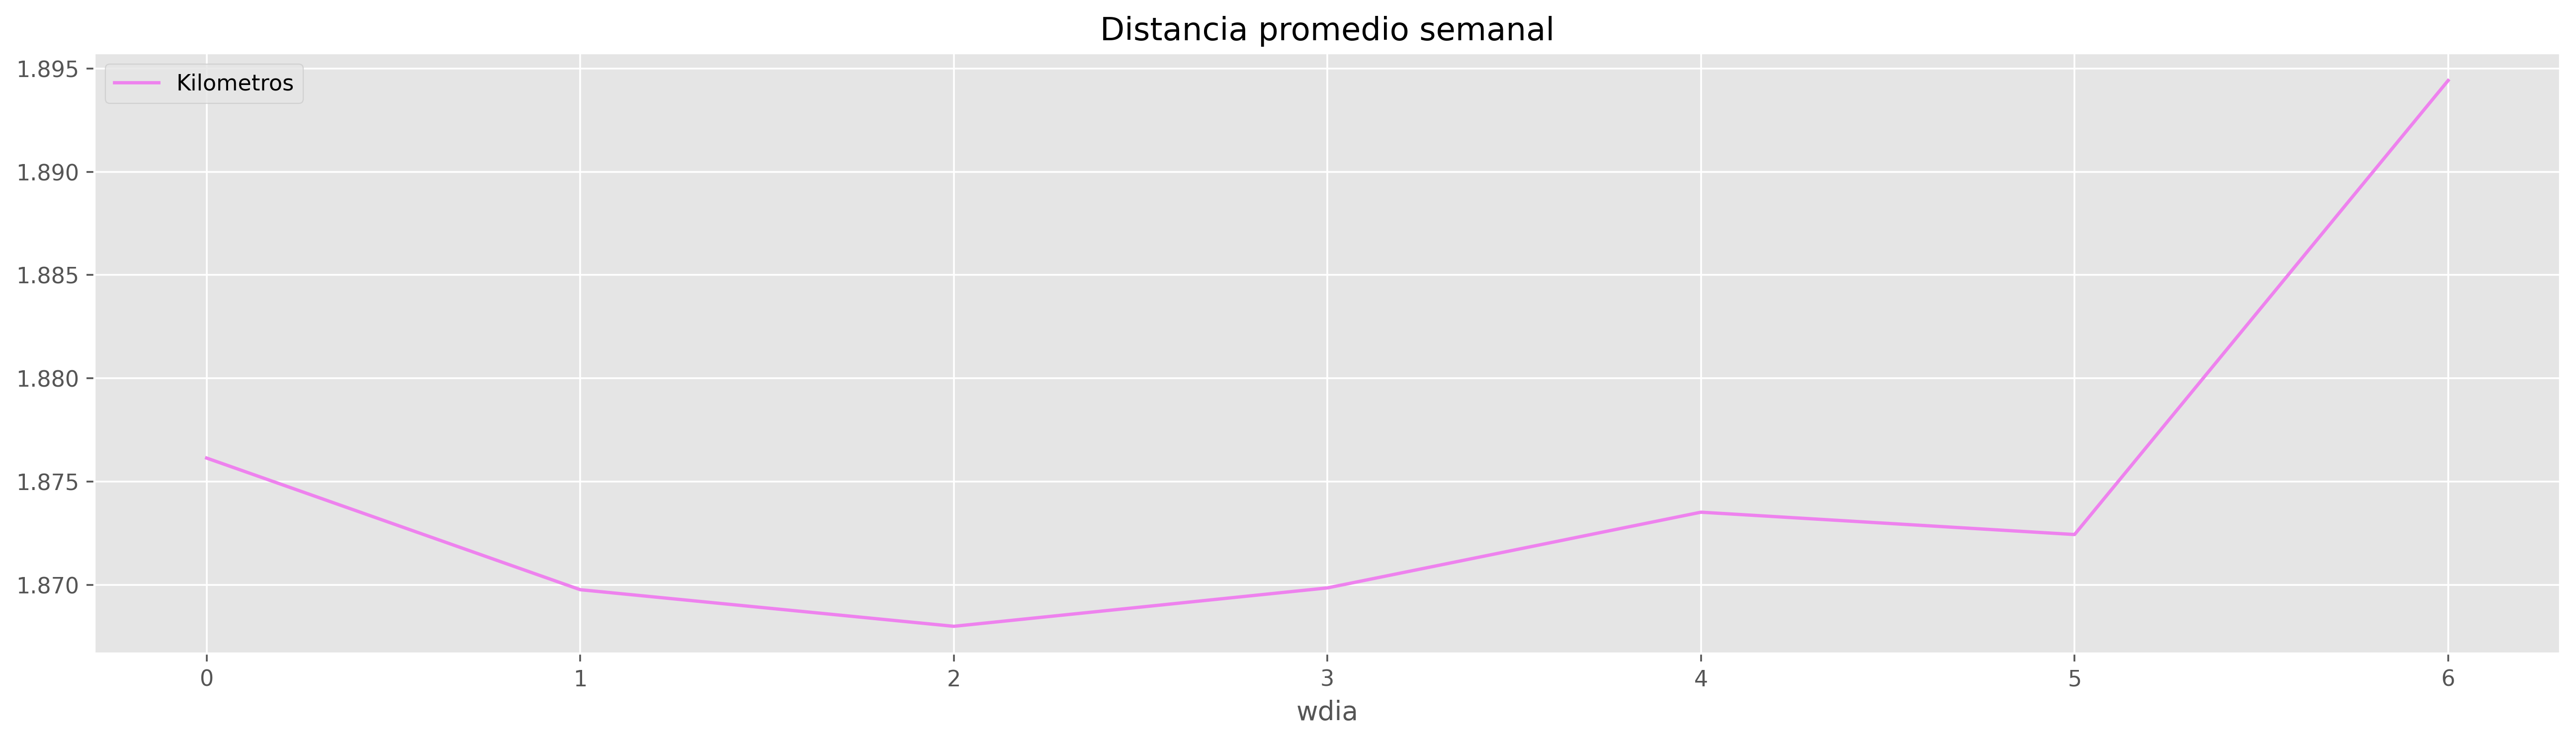

In [18]:
semana['distancia'].mean().plot( kind = 'line', label = 'Kilometros', color = { 'Kilometros': 'violet' })
pyplot.legend( loc = 'best' )
pyplot.title( 'Distancia promedio semanal' )
pyplot.show()

In [ ]:
# SEASONING HORARIO 'dhabil' == 0

In [19]:
horario = datasets['recorridos']['df'][ datasets['recorridos']['df']['dhabil'] == 0 ].groupby(
    ['origen_nombre', 'origen_id','hora',]
).agg(
  salidas = ( 'hora',  'count'),
  duracion = ( 'duracion_mins',  'mean'),
  distancia = ( 'distancia',  'mean'),
)
horario = horario.pivot_table(
    index = [ 'origen_nombre',  'origen_id', ],
    columns = ['hora'],
    values = ['salidas', 'duracion', 'distancia'],
    # aggfunc ='sum',
    fill_value =0,
).sort_values('origen_id')
horario

distancia                                \
hora                                 0         1         2         3    
origen_nombre       origen_id                                           
FACULTAD DE DERECHO 1          1.367273  2.113333  3.156667  2.442000   
RETIRO I            2          1.170000  3.060000  0.000000  0.000000   
ADUANA              3          3.956667  2.486667  0.000000  0.620000   
PLAZA ROMA          4          2.136667  3.750000  3.836667  4.886667   
PLAZA ITALIA        5          2.662500  2.485000  2.132500  2.832353   
...                                 ...       ...       ...       ...   
BARRIO 31           393        1.568571  1.606667  0.000000  6.370000   
AV. LA PLATA        394        0.000000  0.000000  0.000000  0.000000   
AGRONOMIA II        395        0.000000  0.000000  0.000000  0.000000   
PLAZA ALBERTI       396        1.645238  2.100455  1.808333  6.000000   
GARCIA DEL RIO      399        2.052222  1.895455  3.850000  2.835000   

                                                                       \
hora                                 4         5         6         7    
origen_nombre       origen_id                                           
FACULTAD DE DERECHO 1          1.690000  3.636667  2.139091  2.173333   
RETIRO I            2          0.000000  1.623333  2.770000  1.918000   
ADUANA              3          0.000000  0.485000  2.440000  1.214000   
PLAZA ROMA          4          4.180000  3.125000  1.215000  3.267778   
PLAZA ITALIA        5          3.306667  1.767778  1.374615  1.992000   
...                                 ...       ...       ...       ...   
BARRIO 31           393        2.870000  0.889231  1.431429  1.950000   
AV. LA PLATA        394        0.000000  0.000000  0.000000  0.000000   
AGRONOMIA II        395        0.000000  0.000000  0.000000  0.000000   
PLAZA ALBERTI       396        1.573333  1.367500  4.658750  2.658571   
GARCIA DEL RIO      399        1.810000  3.839333  1.950000  2.408333   

                                                   ... salidas                 \
hora                                 8         9   ...      14   15   16   17   
origen_nombre       origen_id                      ...                          
FACULTAD DE DERECHO 1          2.024706  2.505000  ...     153  218  239  231   
RETIRO I            2          2.835000  1.999333  ...      30   21   46   37   
ADUANA              3          1.551111  1.811667  ...      28   31   28   26   
PLAZA ROMA          4          1.560000  1.555714  ...      11   29   31   36   
PLAZA ITALIA        5          1.917273  1.947179  ...     122  165  188  201   
...                                 ...       ...  ...     ...  ...  ...  ...   
BARRIO 31           393        1.935714  0.888000  ...      13   18   20   39   
AV. LA PLATA        394        0.000000  0.000000  ...       4    9    6    5   
AGRONOMIA II        395        0.000000  0.000000  ...       3    4    7    1   
PLAZA ALBERTI       396        1.937222  2.394857  ...      58   77   83   97   
GARCIA DEL RIO      399        1.152432  2.121429  ...     110  151  190  150   

                                                          
hora                            18   19   20  21  22  23  
origen_nombre       origen_id                             
FACULTAD DE DERECHO 1          248  218  163  97  53  11  
RETIRO I            2           42   35   19  19  13   7  
ADUANA              3           29   13    8   8   8   7  
PLAZA ROMA          4           24   14    9   0   4   4  
PLAZA ITALIA        5          197  151  107  57  32  21  
...                            ...  ...  ...  ..  ..  ..  
BARRIO 31           393         26    6    8   7   6   4  
AV. LA PLATA        394          4    2    2   4   0   0  
AGRONOMIA II        395          3    2    2   4   0   0  
PLAZA ALBERTI       396         88   62   64  42  19  21  
GARCIA DEL RIO      399        159  146   86  60  34  26  

[235 rows x 72 columns

In [20]:
# HORA PICO en  dias no laborables
horario['salidas'].sum()[ 
    horario['salidas'].sum() == horario['salidas'].sum().max()
]

hora
17    14741
dtype: int64

In [21]:
# HORA MENOS USO PROMEDIO   dias no laborables
horario['salidas'].mean().astype(int)[
    horario['salidas'].mean() == horario['salidas'].mean().min()
]

hora
4    3
dtype: int64

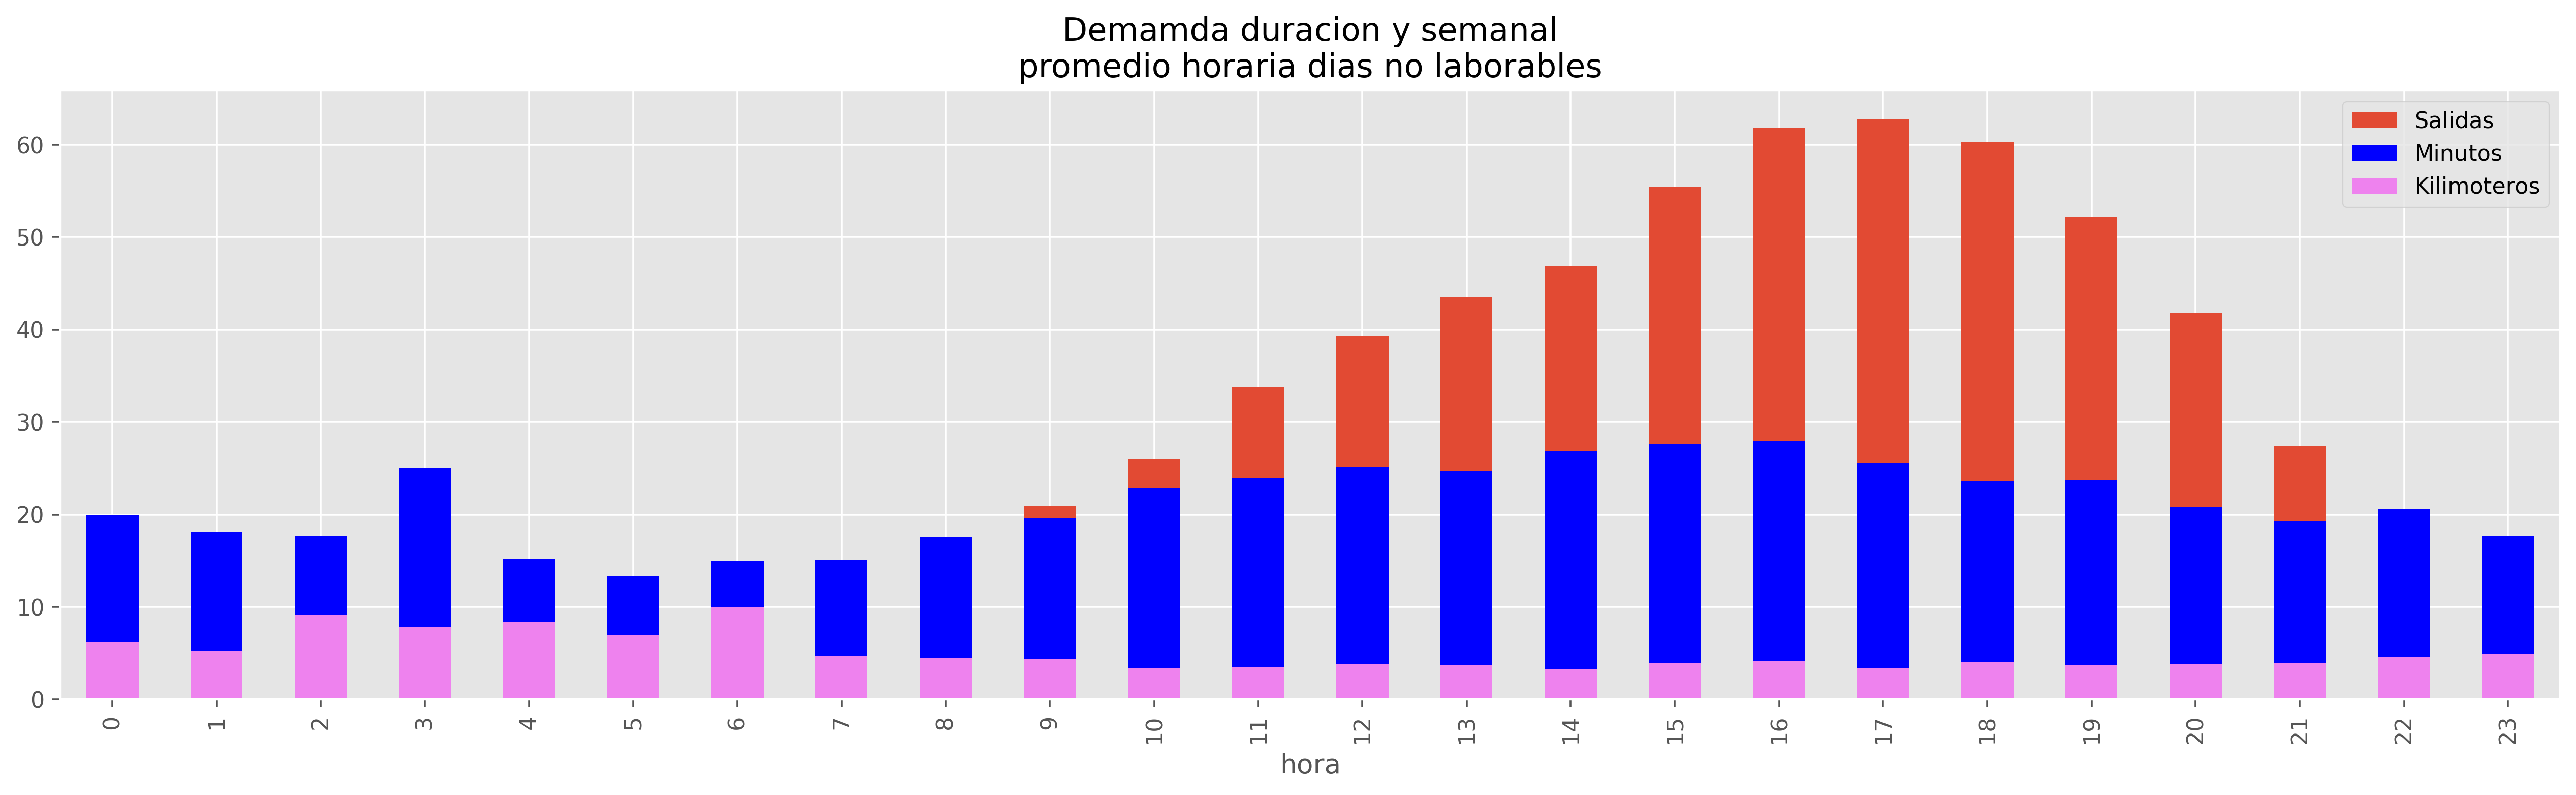

In [26]:
horario['salidas'].mean().plot( kind = 'bar', label = 'Salidas')
horario['duracion'].mean().plot( kind = 'bar',label = 'Minutos', color={'blue' })
horario['distancia'].max().plot(
    kind  = 'bar',
    label = 'Kilimoteros',
    color = 'violet' 
)
pyplot.legend( loc = 'best' )
pyplot.title( 'Demamda duracion y semanal\npromedio horaria dias no laborables' )
pyplot.show()

In [ ]:
# ESTACIONES
# https://sharkcoder.com/data-visualization/mpl-stacked-bars

# top = horario['salidas'].mean().sort_values( ascending = False )[ 
# #     estaciones['salidas'].mean() >= estaciones['salidas'].mean().mean()
#     horario['salidas'].mean() > 70
# ]

horario['salidas'].plot( 
    kind='line',  
    y = horario['salidas'].columns.tolist()
)
# pyplot.savefig('rolling7mean.jpg')
# pyplot.show()
horario['salidas'].columns.tolist()

In [28]:
# demanda_diaria.mean().sort_values( ascending = True ).head(20).plot( kind='bar',label = 'Salidas' )
estaciones = datasets['recorridos']['df'].groupby(
    ['origen_nombre', 'origen_id', 'fecha' ]
).agg(
  salidas = ( 'origen_id',  'count'),
  arribos = ( 'destino_id',  'count'),
  estaciones = ( 'origen_nombre',  'first'),
#   duracion = ( 'duracion_mins',  'mean'),
)
# .sort_values( 'origen_nombre', ascending = True ).head(20)

estaciones = estaciones.pivot_table(
    index = [ 'fecha'],
    columns = ['estaciones'],
    values = ['salidas', 'arribos'],
    # aggfunc ='sum',
    fill_value = 0,
)

In [29]:
estaciones['salidas'].mean().mean()

30.100393914206204

In [30]:
print( estaciones['salidas'].mean().sort_values( ascending = False ).head( 10) )

estaciones
GODOY CRUZ Y LIBERTADOR       101.965885
PACIFICO                      101.443497
PARQUE CENTENARIO              98.989339
PLAZA BOLIVIA                  92.823028
BARRANCAS DE BELGRANO          86.599147
CONSTITUCIÓN                   73.699360
GENERAL URQUIZA                73.027719
FACULTAD DE DERECHO            70.275053
PLAZA ITALIA                   69.264392
PLAZA REPÚBLICA DE ECUADOR     67.053305
dtype: float64


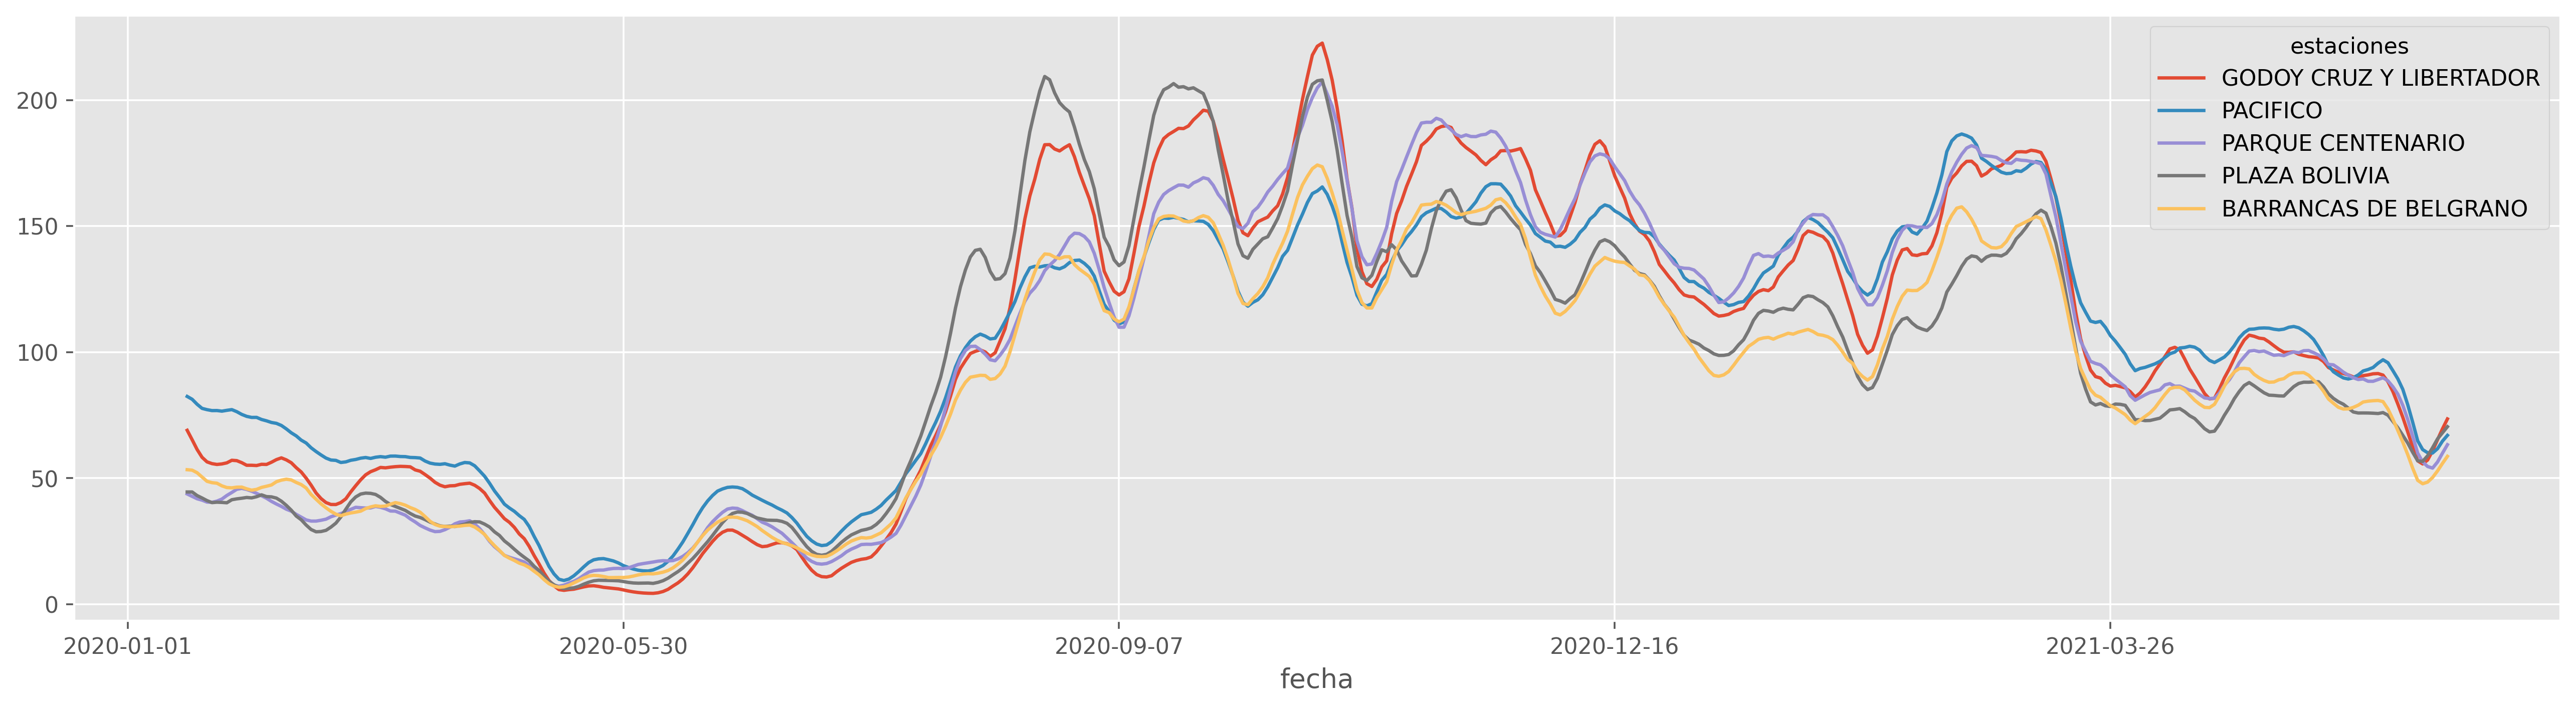

In [32]:
top = estaciones['salidas'].mean().sort_values( ascending = False )[ 
#    (estaciones['salidas'].mean() > 85 ) |  (estaciones['salidas'].mean() < 5)
    estaciones['salidas'].mean() > 80
]
#  win_type='gaussian'
estaciones['salidas'][ top.keys() ].rolling(7).mean().rolling(7).mean().plot( 
#     y = top.keys()
)
# pyplot.savefig('rolling7mean.jpg')
pyplot.show()

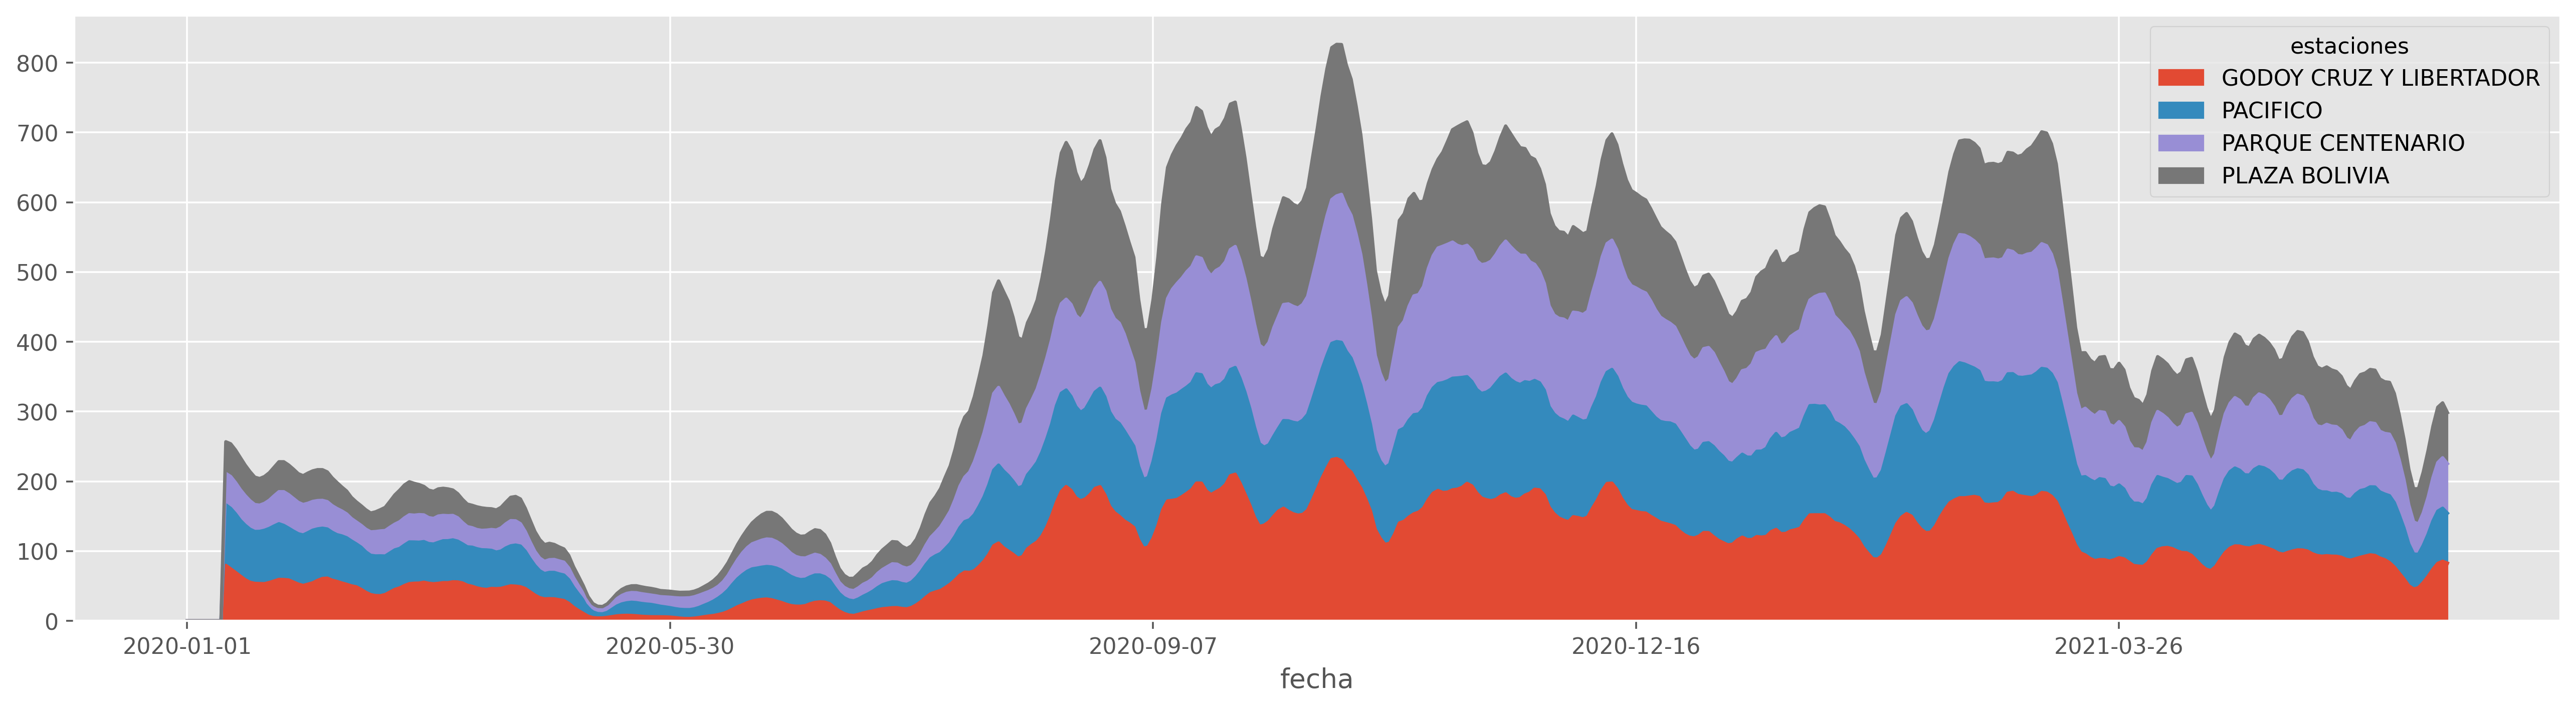

In [33]:
top_quartil = estaciones['salidas'].mean().mean() * 3
tops = estaciones['salidas'].mean().sort_values( ascending = False )[ 
    estaciones['salidas'].mean() > top_quartil  
]
estaciones['salidas'][ tops.keys() ].rolling(5).mean().rolling(5).mean().plot( 
    kind = 'area'
)
pyplot.show()

In [ ]:
# # hay 3 destinos mas q viajes  [333, 397, 47]
# datasets['recorridos']['df'] = datasets['recorridos']['df'][
#     (datasets['recorridos']['df']["destino_id"] != 47)
#     | (datasets['recorridos']['df']["destino_id"] != 333)
#     | (datasets['recorridos']['df']["destino_id"] != 397)
# ]

In [ ]:

# datasets['recorridos']['df'][
#     ( datasets['recorridos']['df']["destino_id"] == 47)
# ]
# datasets['recorridos']['df']

In [36]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html 
# demanda_diaria.mean().sort_values( ascending = True ).head(20).plot( kind='bar',label = 'Salidas' )
# #     3 destinos mas q viajes  [333, 397, 47]
viajes_x_estacion = datasets['recorridos']['df'][
    (datasets['recorridos']['df']["destino_id"] != 47)
    & (datasets['recorridos']['df']["destino_id"] != 333)
    & (datasets['recorridos']['df']["destino_id"] != 397)
]
viajes_x_estacion = viajes_x_estacion.groupby(
    [ 'origen_id', 'destino_id']
).agg(
    salidas = ( 'origen_id',  'count'),
    arribos = ( 'destino_id',  'count')
)
# # media = viajes_x_estacion['salidas'].mean()
# viajes_x_estacion = viajes_x_estacion[
#     (viajes_x_estacion['salidas'] > 200 ) 
# ]

viajes_x_estacion = viajes_x_estacion.pivot_table(
    index = [ 'origen_id'],
    columns = ['destino_id'], 
    values = [ 'salidas', 'arribos'],
    fill_value = 0,
)
# viajes_x_estacion = viajes_x_estacion[ tops_idxs.keys() ]
# print(tops_idxs)
viajes_x_estacion['salidas']

destino_id,1,2,3,4,5,6,7,8,9,12,...,378,381,384,387,391,393,394,395,396,399
origen_id,,,,,,,,,,,,,,,,,,,,,
1,3714,458,62,104,555,57,15,174,471,394,...,0,379,13,1,833,156,0,0,82,13
2,383,293,61,88,64,39,9,77,76,74,...,1,93,3,0,40,940,0,0,11,2
3,86,36,663,192,8,175,17,148,12,43,...,0,10,11,2,1,87,0,0,4,0
4,73,30,194,344,17,102,20,63,18,28,...,0,4,2,3,2,48,0,0,2,2
5,566,81,13,20,3490,18,8,65,367,164,...,1,443,111,2,1030,51,0,0,146,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,123,952,75,48,98,3,13,50,23,128,...,0,86,0,2,11,1465,0,1,1,0
394,0,0,0,0,0,2,0,5,1,0,...,0,0,0,23,3,0,136,0,0,0
395,0,0,0,0,1,0,1,1,1,0,...,17,0,0,0,1,0,0,79,3,3


In [37]:
viajes_x_estacion['arribos']

destino_id,1,2,3,4,5,6,7,8,9,12,...,378,381,384,387,391,393,394,395,396,399
origen_id,,,,,,,,,,,,,,,,,,,,,
1,3714,458,62,104,555,57,15,174,471,394,...,0,379,13,1,833,156,0,0,82,13
2,383,293,61,88,64,39,9,77,76,74,...,1,93,3,0,40,940,0,0,11,2
3,86,36,663,192,8,175,17,148,12,43,...,0,10,11,2,1,87,0,0,4,0
4,73,30,194,344,17,102,20,63,18,28,...,0,4,2,3,2,48,0,0,2,2
5,566,81,13,20,3490,18,8,65,367,164,...,1,443,111,2,1030,51,0,0,146,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,123,952,75,48,98,3,13,50,23,128,...,0,86,0,2,11,1465,0,1,1,0
394,0,0,0,0,0,2,0,5,1,0,...,0,0,0,23,3,0,136,0,0,0
395,0,0,0,0,1,0,1,1,1,0,...,17,0,0,0,1,0,0,79,3,3


In [38]:
print(viajes_x_estacion.shape)

(233, 466)


In [ ]:
# viajes_x_estacion['salidas'][1][2]
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
# X = np.random.randn(10)
# Y = np.random.randn(10)
# # computing the corrlation matrix
# # https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html
# C = np.corrcoef(X,Y)

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
# def histogram_intersection(a, b):
#     v = np.minimum(a, b).sum().round(decimals=1)
#     return v
# df = pd.DataFrame(
#     [ (.2, .3), (.0, .6), (.6, .0), (.2, .1) ],
#     columns = ['dogs', 'cats']
# )
# df.corr( method = histogram_intersection )

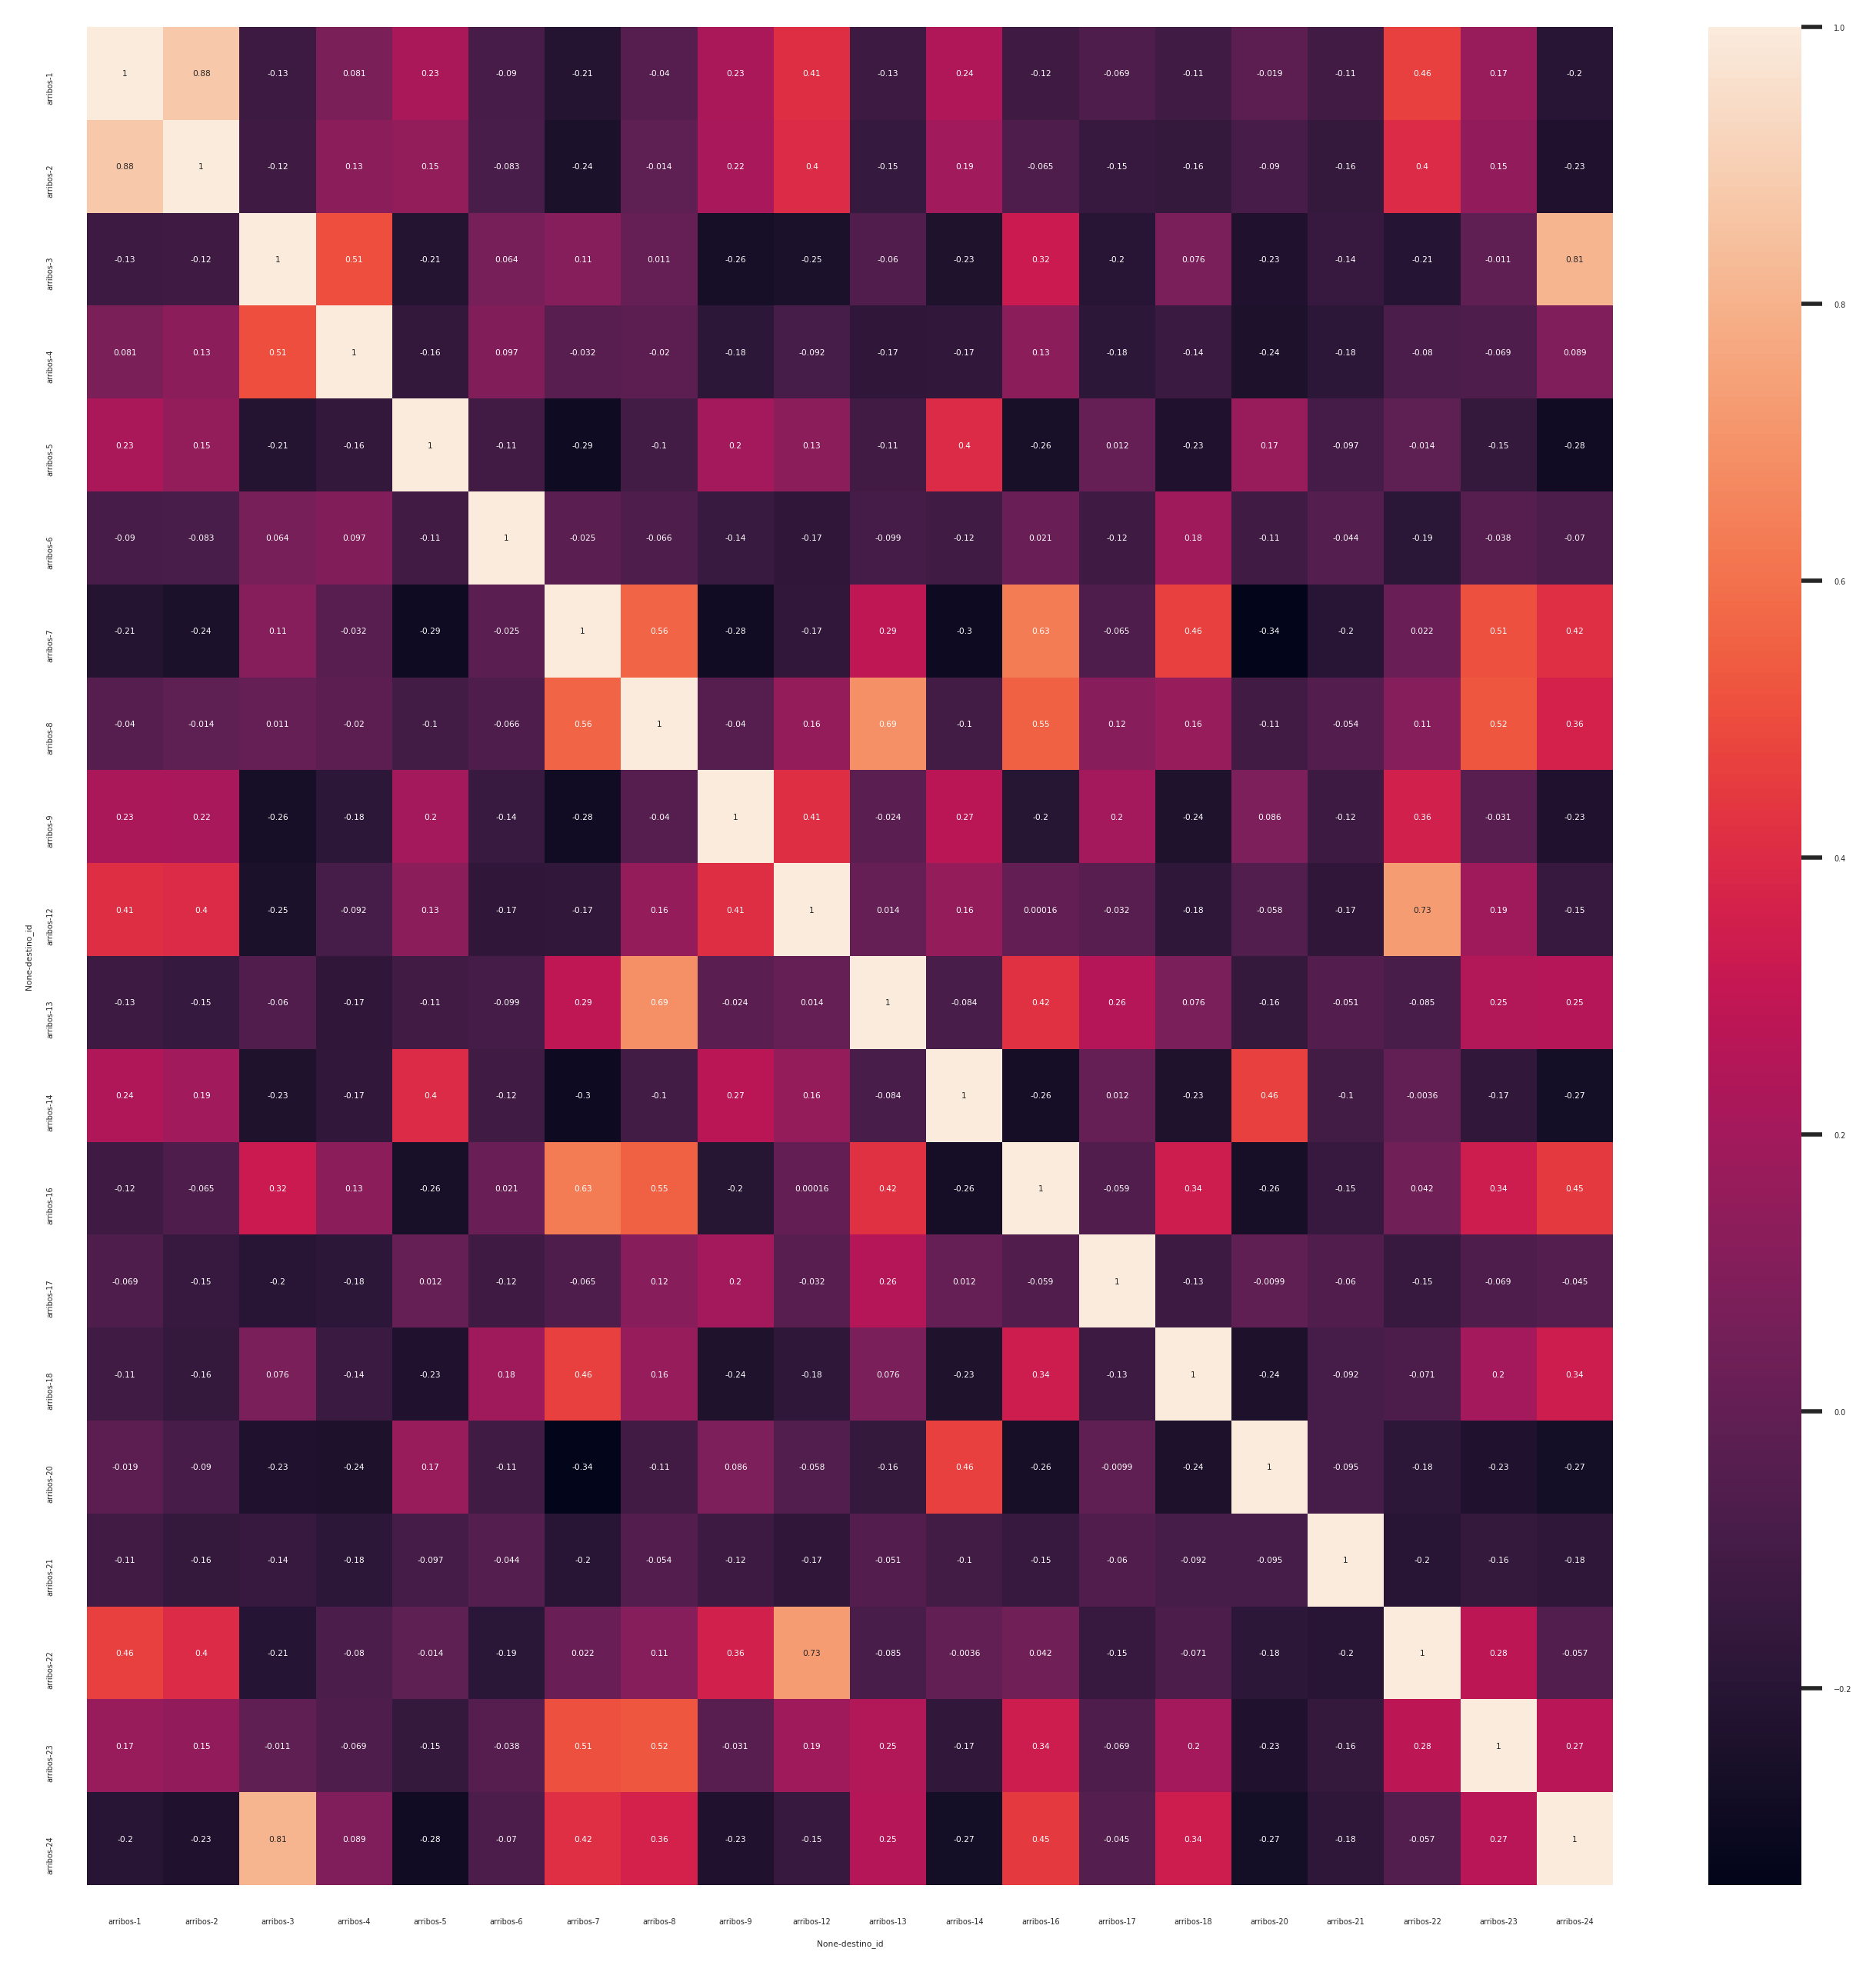

In [40]:
import seaborn as sns
# taking 6 rows but only 6 columns
df_small = viajes_x_estacion.iloc[:20,:20]
# df_plain = [ x for x in df_small['salidas']]
# df = pd.DataFrame(
#     [(.2, .3), (.0, .6), (.6, .0), (.2, .1)],
#     columns = ['salidas', 'arribos']
# )

def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round( decimals = 1 )
    return v
correlation_mat = df_small.corr( method = histogram_intersection )

# https://www.webcodegeeks.com/python/python-correlation-matrix-tutorial/
correlation_mat = df_small.corr()
pyplot.rcParams[ 'figure.figsize' ] = ( 10, 10 )

sns.heatmap( correlation_mat, annot = True)
sns.set(font_scale = 0.2)
sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
# sns.clustermap(data=corr, annot=True, fmt='d', cmap="Blues", annot_kws={"size": 16})

pyplot.show()

In [ ]:
# salidas = [ viajes_x_estacion['salidas'][x] for x in viajes_x_estacion['salidas'].index ]
# # origenes
# llegadas = [ item for sublist in salidas for item in sublist ]
# # len(llegadas)
# boxplot = viajes_x_estacion.boxplot( column=['arribos'] )


In [ ]:
# demanda_diaria.mean().sort_values( ascending = True ).head(20).plot( kind='bar',label = 'Salidas' )
clima = datasets['recorridos']['df'].groupby(
    ['origen_nombre', 'origen_id', 'fecha' ]
).agg(
  salidas = ( 'origen_id',  'count'),
#   estaciones = ( 'origen_nombre',  'first'),
  PRCP = ( 'PRCP',  'mean'),
  TEMP = ( 'TEMP',  'mean'),
#   duracion = ( 'duracion_mins',  'mean'),
)
# .sort_values( 'origen_nombre', ascending = True ).head(20)

clima = clima.pivot_table(
#     index = [ 'fecha'],
    columns = ['fecha'],
    values = [ 'salidas', 'TEMP'],
    # aggfunc ='sum',
    fill_value = 0,
)
# https://sharkcoder.com/data-visualization/mpl-stacked-bars
climatop = clima['TEMP'].mean().sort_values( ascending = False )[ 
#     estaciones['salidas'].mean() >= estaciones['salidas'].mean().mean()
#       (estaciones['salidas'].mean() > 85 ) |  (estaciones['salidas'].mean() < 5)
    clima['TEMP'].mean() > 70
]
#  win_type='gaussian'
climadf = clima['TEMP'].rolling( 7 ).mean().rolling( 7 ).mean()
climadf.plot( kind='line',  y = climadf.columns.tolist() )
# pyplot.savefig('rolling7mean.jpg')
pyplot.show()

In [ ]:
datasets['recorridos']['df'].info()
#  FF                float64
#  24  HUM               float64
#  25  PNM               float64
#  26  TEMP              float64
#  27  PRCP              float64
#  28  TAVG              float64

In [ ]:
clima =  datasets['recorridos']['df'].groupby(
    ['fecha']
).rolling(
    12,
    min_periods = 0, 
    max_periods = 50, 
    win_type='gaussian'
).agg(
    {
      "usuario_id": "count",
#      "HUM"  : "mean",
#      "PNM"  : "mean",
     "PRCP" : "mean",
#      "TAVG" : "mean",
     "TEMP" : "mean",
    }
).plot( kind = 'line')
# clima['fecha']
# 
# pyplot.show()

In [ ]:
# # pyplot.plot( demanda_diaria['duracion'].rolling(21).mean(),label= 'MA 21 days')
# pyplot.legend( loc = 'best' )
# pyplot.title( 'Duracion AVG  delta' )
# pyplot.show()

# diaria['salidas'].mean().sort_values( ascending = True ).head(20).plot( kind='bar',label = 'Salidas' )
# pyplot.legend( loc = 'best' )
# pyplot.title( 'Dias de menos demamda' )
# pyplot.show()

top = estaciones['salidas'].rolling(window=3).mean()[ 
#     estaciones['salidas'].mean() >= estaciones['salidas'].mean().mean()
    estaciones['salidas'].rolling(window=3).mean() > 1000
]
estaciones['salidas'][ top.keys() ].plot( )
pyplot.legend( loc = 'best' )
pyplot.title( 'Salidas promedio por arriba de la 70' )
pyplot.show()
# estaciones.info()

In [ ]:
estaciones['salidas'].mean().sort_values( ascending = False ).head(20).plot( kind='bar', label = 'Salidas' )
pyplot.legend( loc = 'best' )
pyplot.title( '20 estaciones de mayor demanda diaria maxima' )
pyplot.show()

In [ ]:
estaciones['salidas'].mean().sort_values( ascending = False ).tail(20).plot( kind='bar',label = 'Salidas' )
pyplot.legend( loc = 'best' )
pyplot.title( '20 estaciones de menor demanda maxima' )
pyplot.show()

In [ ]:
# # https://sharkcoder.com/data-visualization/mpl-bidirectional
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import pandas as pd
# import seaborn as sns
# sns.set()
# %matplotlib notebook
# font_color = '#525252'
# hfont = {'fontname':'Calibri'}
# facecolor = '#eaeaf2'
# color_red = '#fd625e'
# color_blue = '#01b8aa'
# index = data.index
# column0 = data['Expenditures']
# column1 = data['Revenues']
# title0 = 'Expenditures, USD thousand'
# title1 = 'Revenues, USD thousand'    
#     fig, axes = plt.subplots(figsize=(10,5), facecolor=facecolor, ncols=2, sharey=True)
# fig.tight_layout()



# axes[0].barh(index, column0, align='center', color=color_red, zorder=10)
# axes[0].set_title(title0, fontsize=18, pad=15, color=color_red, **hfont)
# axes[1].barh(index, column1, align='center', color=color_blue, zorder=10)
# axes[1].set_title(title1, fontsize=18, pad=15, color=color_blue, **hfont)
#     # If you have positive numbers and want to invert the x-axis of the left plot
# axes[0].invert_xaxis() 

# # To show data from highest to lowest
# plt.gca().invert_yaxis()
#     axes[0].set(yticks=data.index, yticklabels=data.index)
# axes[0].yaxis.tick_left()
# axes[0].tick_params(axis='y', colors='white') # tick color
#     axes[1].set_xticks([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000])

# plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
            
# filename = 'mpl-bidirectional'
# plt.savefig(filename+'.png', facecolor=facecolor)

In [ ]:
# # MEDIA MOVIL
# # import pandas_datareader.data as web
# # import matplotlib.pyplot as plt
# # import datetime
# # figure( figsize=(20, 5), dpi=320 )

# # pyplot.plot( demanda_diaria['duracion'].mean(), label= 'Duracion AVG' )
# demanda_diaria['duracion'].mean().plot( label = 'Duracion AVG' )

# # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
# # pyplot.plot( demanda_diaria['duracion'].rolling(9).mean(), label= 'MA 9 days')
# # pyplot.plot( demanda_diaria['duracion'].rolling(21).mean(),label= 'MA 21 days')
# pyplot.legend( loc = 'best' )
# pyplot.title( 'Duracion AVG  delta' )
# pyplot.show()

diaria['salidas'].mean().sort_values( ascending = True ).head(20).plot(
    kind='bar',
    label = 'Salidas'
)
pyplot.legend( loc = 'best' )
pyplot.title( 'Dias de menos demamda' )
pyplot.show()


In [ ]:
# demanda_estaciones['salidas'].plot()
# # pyplot.legend( loc = 'best' )
# pyplot.title( 'Demanda diaria por estacion' )
# pyplot.show()

In [ ]:
# # print(demanda_diaria['salidas'])
# for dia in demanda_diaria['salidas'].columns.to_list():
# #     demandas = demanda_diaria['salidas'][h]
#     estaciones = demanda_diaria['salidas'][dia].reset_index()
#     for e in estaciones.iterrows():
#         estacion = e[1]
#         estacion_origen =  estacion['origen_id']
#         estacion_salidas =  estacion[h]
#         print(h, estacion_origen, estacion_salidas)

### Gruping

### GRUPING & RESHAIPING
#### DEMANDA DIARIA

In [ ]:
# GRUPING USERS
usurios = datasets['recorridos']['df'].groupby(
    ['usuario_id']
).agg(
  salidas = ( 'destino_id',  'count'),
  vueltas = ( 'vuelta',  'sum'),
  velocidad = ( 'velocidad_kmm',  'mean'),
  distancia = ( 'distancia',  'mean')
)
# usurios = usurios.pivot_table(
#     index   = [ 'usuario_id'],
#     columns = 'salidas',
#     values  = 'salidas',
#     # aggfunc = 'count',
# ).sort_values('origen_id')
# demanda_diaria # comprobar

In [ ]:
usurios = usurios[ ~usurios.isin( [np.nan, np.inf, -np.inf]).any(1) ]
# usurios
usurios.sort_values( 'salidas' , ascending = False).head(30)

In [ ]:
usurios['salidas'].sort_values( ascending = False ).head(20).plot( kind = 'bar',label = 'salidas')
pyplot.legend( loc = 'best' )
pyplot.title( 'salidas x usuario' )
pyplot.show()

# Analisis Exploratorio de Datos Espaciales



## Exploratory Spatial Data Analysis (ESDA)

https://alcidanalytics.com/p/geographic-heatmap-in-python

https://alysivji.github.io/getting-started-with-folium.html

https://medium.com/analytics-vidhya/measure-driving-distance-time-and-plot-routes-between-two-geographical-locations-using-python-39995dfea7e

In [ ]:
# demanda_viz = derivados['recorridos']['df']
# # Fitro x dia

# demanda_viz = demanda_viz[ demanda_viz['fecha'] == '2020-01-01' ]
# demanda_viz

In [ ]:

# mexclar con long lat de estaciones
demanda_viz = datasets['recorridos']['df']
# Fitro x dia
fecha_viz   = '2020-03-01'
demanda_viz = demanda_viz[ demanda_viz['fecha'] == fecha_viz ]
demanda_viz = demanda_viz.groupby(
    ['origen_nombre', 'origen_id', 'hora', 'origen_lon','origen_lat']
).agg(
  salidas = ( 'hora',  'count' ),
  nombre  = ( 'origen_nombre',  'first' ),
  id      = ( 'origen_id',  'first' ),
  lon     = ( 'origen_lon',  'first' ),
  lat     = ( 'origen_lat',  'first' ),
)
# ).reset_index()
# df.set_index(['id', 'date', 'location'], append=True)
demanda_viz = demanda_viz.pivot_table(
    index = [ 'nombre',  'id', 'lon', 'lat'],
    columns = 'hora',
    values = 'salidas',
    fill_value = 0,
    # aggfunc = 'sum',
).sort_values('id')

In [ ]:
# import folium
# from folium import plugins
# # import pandas as pd
# # import matplotlib.pyplot as plt
# import seaborn as sns

# %matplotlib inline

In [ ]:
#... where m is my map object. And 5 is the time (seconds) to render the map.
# https://stackoverflow.com/questions/53565979/export-a-folium-map-as-a-png
# https://blog.ouseful.info/2015/12/15/grabbing-screenshots-of-folium-produced-choropleth-leaflet-maps-using-selenium/
# from time import sleep
import io
from PIL import Image

# !pip install folium selenium
import folium 
from folium.features import DivIcon
import selenium

import math
def mapear(x): 
    return int( (x / 10 ) * 255)



In [ ]:
# del m
m = ''
for h in demanda_viz.columns.to_list():
    del m
    m = folium.Map(
#         [ -34.606499,-58.381094 ], # obelisco
        [-34.606739, -58.435539 ], # parque centenario
        zoom_start = 13,
        zoom_control=False,
        scrollWheelZoom=False,
        dragging=False
#         tiles='stamentoner'
    )
    folium.map.Marker(
        [ -34.559920, -58.372211 ],
        icon = DivIcon(
            icon_size=(600,400),
            icon_anchor=(0,0),
            html='<div style='font-size: 20pt;font-family: monospace;'>' \
            + fecha_viz + ' HORA:' + '{:02d}'.format( h ) \
            + '</div>',
        )
    ).add_to(m)
    demandas = demanda_viz[h]
    estaciones = demanda_viz[h].reset_index()
    for e in estaciones.iterrows():
        estacion = e[1]
        folium.CircleMarker(
            [ estacion['lat'], estacion['lon'] ],
            radius = estacion[h] * 5, 
            popup = '{0}\:{1}\demanda:{2}'.format(
                estacion['id'],
                estacion['nombre'],
                str(estacion[h]),
            ),
            fill_color = '#{0:02x}{1:02x}{2:02x}'.format(
                mapear( int(estacion[h]) ),
                255 - mapear( int(estacion[h]) ) ,
                255 - mapear( int(estacion[h]) )
            )
        ).add_to(m)
#     m.save( 'ESDA/' + fecha_viz + '_' + '{:02d}'.format( h ) + '_' + 'map.html')
    
    img_data = m._to_png(5)
    img = Image.open(io.BytesIO(img_data))
    img.save( 'ESDA/' + fecha_viz + '_' + '{:02d}'.format( h ) + '_' + 'map.png' )

In [ ]:
# !convert -density 72 'ESDA/2020-03-01_00_map.html' '2020-03-01_00_map.html'


In [ ]:
# !ffmpeg -pattern_type glob -i './ESDA/*.png' -vf zoompan=z=1:d=4:s=1366x683:fps=5,framerate=25 -vcodec libx264 -acodec aac ESDA.mp4
!ffmpeg -pattern_type glob -i './ESDA/*.png' -vf zoompan=z=1:d=4:s=1366x683:fps=5,framerate=25 -vcodec libx264 -an ESDA.mp4

## reserva

In [ ]:
# # !pip install ffmpeg-python
# import ffmpeg
# # stream = ffmpeg.input('input.mp4')
# # stream = ffmpeg.hflip(stream)
# # stream = ffmpeg.output(stream, 'output.mp4')
# # ffmpeg.run(stream)
# del stream
# stream = ffmpeg.input( 'ESDA/*.png', pattern_type = 'glob', framerate = 24 )
# stream = ffmpeg.output( stream, 'ESDA.mp4')
# ffmpeg.run(stream)


In [ ]:
# import math
# def mapear(x): 
#   return int( (x / 30295 ) * 255) 
# m = folium.Map(
#   [ -34.606499,-58.381094 ],
#   zoom_start = 14
# )
# #  mark each station as a point
# for e in derivados['estaciones']['df'].iterrows():
#   folium.CircleMarker(
#       [ estacion['lat'], estacion['lon'] ],
#       radius= estacion['salidas'] * 0.002, 
#       popup = '{0}\nsalidas:{1}\narribos:{2}'.format(
#           estacion['nombre'],
#           str(estacion['salidas']),
#           str(estacion['arribos'])
#       ),
#       fill_color = '#{0:02x}{1:02x}{2:02x}'.format(
#           mapear( int(estacion['salidas']) ),
#           255 - mapear( int(estacion['salidas']) ) ,
#           255 - mapear( int(estacion['salidas']) )
#       )
#   ).add_to(m)
# m

In [ ]:
# del m
m = map_points(
    derivados['estaciones']['df'],
    plot_points = False,
    draw_heatmap = True,
    heat_map_weights_col = 'salidas',
    heat_map_weights_normalize = True,
)
m